# Data Preprocessing Notebook

This notebook is used to filter out the unwanted data and create a dataframe that has a link to all the relevant data for training

## Library Imports

In [17]:
from helper_code import *
import numpy as np, os, sys, joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

# Extract Relevant Recordings

A dataframe is constructed with the recording filename and labels for Afib, Aflutter, SVT and Myocardial Infarction

In [21]:
new_dirs = ['data/cpsc', 'data/cpsc2', 'data/georgia', 'data/ptbxl', 'data/chapman', 'data/ningbo']

In [22]:
dirs_dict = {'data/cpsc':'CP', 'data/cpsc2':'C2', 'data/georgia':'GE', 'data/ptbxl':'PT', 'data/chapman':'CH', 'data/ningbo':'NI'}

In [23]:
data_arr = []

for folder in new_dirs:    
    data_directory = folder
    headers, recordings = find_challenge_files(data_directory)

    for i in range(len(headers)):
        header = load_header(headers[i])
        samples = get_num_samples(header)
        
        # only data less than 20s is kept. clip the datasets longer than 10s to its first 10s
        if samples > 10000 or samples < 5000:
            continue
                
        entry = [recordings[i], 0, 0, 0, 0, '']
        
        header = load_header(headers[i])
        labels = get_labels(header)
        
        if '164889003' in labels:
            entry[1] = 1
        if '164890007' in labels:
            entry[2] = 1
        if '164865005' in labels:
            entry[3] = 1
        if '426761007' in labels:
            entry[4] = 1
        
        entry[5] = dirs_dict[data_directory]

        data_arr.append(entry)

In [24]:
df = pd.DataFrame(data_arr, columns = ['Recording', 'Afib', 'Afl', 'MI', 'SVT', 'DB'])
df

,Recording,Afib,Afl,MI,SVT,DB
0,data/cpsc/A2112.mat,0,0,0,0,CP
1,data/cpsc/A4563.mat,0,0,0,0,CP
2,data/cpsc/A0705.mat,0,0,0,0,CP
3,data/cpsc/A6374.mat,0,0,0,0,CP
4,data/cpsc/A6412.mat,0,0,0,0,CP
...,...,...,...,...,...,...
85738,data/ningbo/JS38132.mat,0,0,0,0,NI
85739,data/ningbo/JS37201.mat,0,0,0,0,NI
85740,data/ningbo/JS28321.mat,0,0,0,0,NI
85741,data/ningbo/JS41397.mat,0,0,0,0,NI


In [25]:
recording_file = df.iloc[37438]['Recording']
recording = load_recording(recording_file)

print("Recording is of type {}".format(type(recording)))
print("Recording shape: {}".format(recording.shape))

Recording is of type <class 'numpy.ndarray'>
Recording shape: (12, 5000)


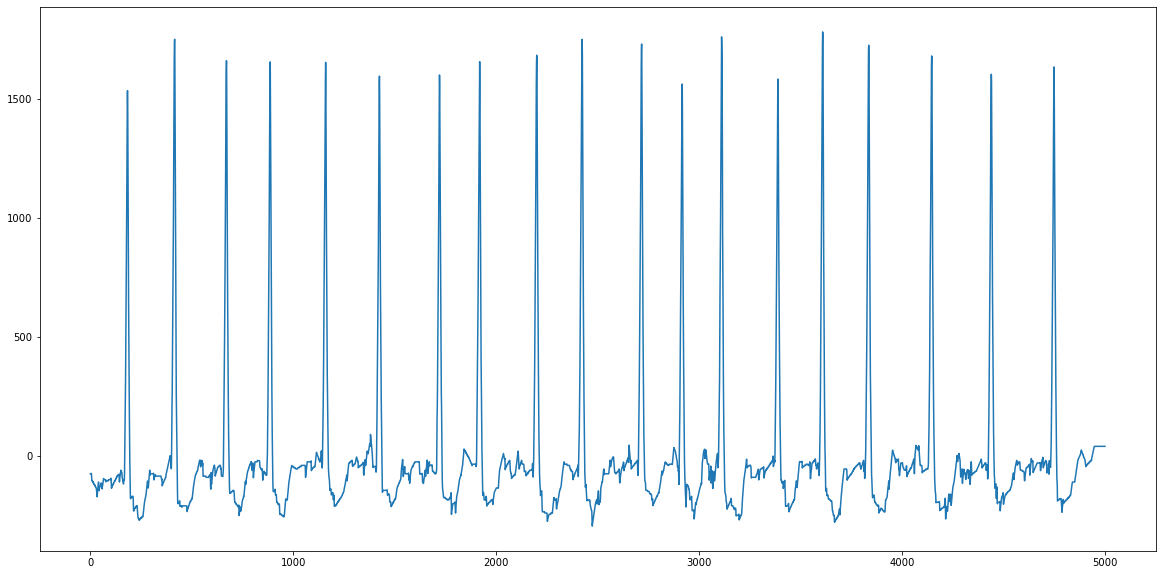

In [26]:
plt.figure(figsize=(20,10))
plt.plot(list(range(len(recording[1]))), recording[1])

In [ ]:
# Save the dataframe to a csv for future use
df.to_csv('full_dataset.csv', index=False)